In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


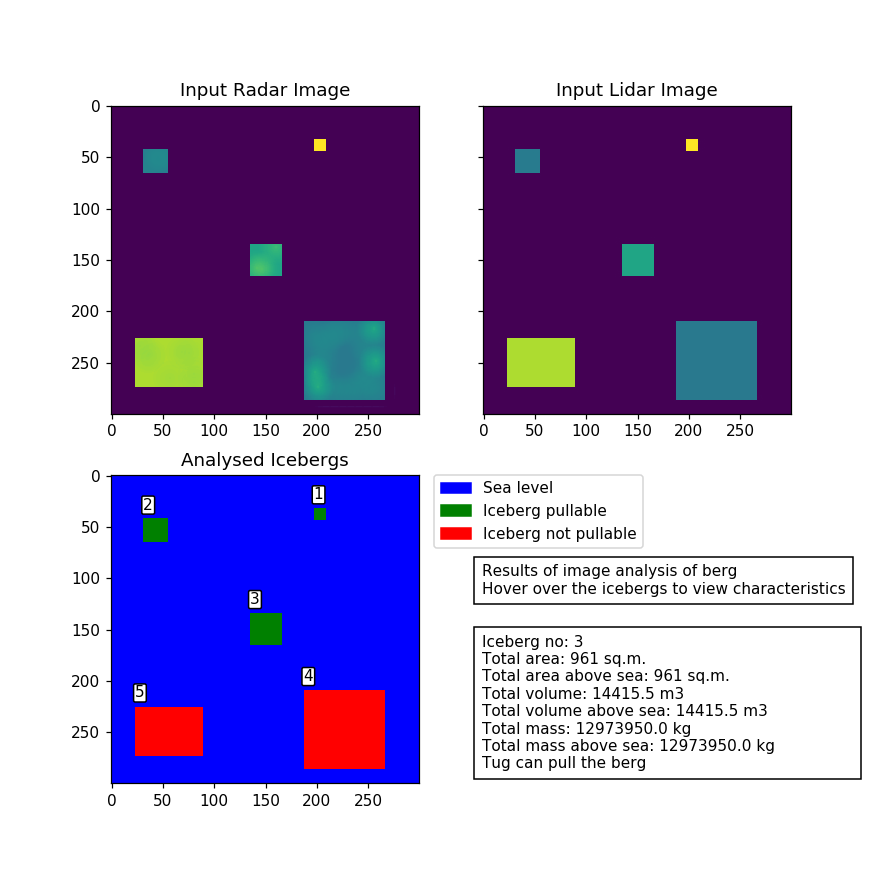

In [10]:
# -*- coding: utf-8 -*-
"""
Date Last Updated: 
    Mar 29, 2019

Author: 
    Orkhan Hajiyev (gy17oh)

Title: 
    Assignment 2. Module GEOG5991M
    White Star Line Project

Version: 
    2.0

Purpose: 
    To implement the requirements of the Assignment 2 of the Module GEOG5991M.
    The version was built to analyse MULTIPLE iceberg images.
    
    White Star Line was selected as the project to satisfy the assignment's
    description. The link to the project's problem definition:
    https://www.geog.leeds.ac.uk/courses/computing/
    study/core-python-odl/assessment2/ice.html
    
License: 
    Copyright (c) 2019 Orkhan Hajiyev
    Lisence under MIT License
    License link: 
        https://github.com/ohajiyev/Assignment2/blob/master/LICENSE.md
       
Github Repo Link: 
    https://github.com/ohajiyev/Assignment2
    
Code Folder Link:
    https://github.com/ohajiyev/Assignment2/tree/master/python/src/unpackaged/
    ice/Version2

Zip file link:
    https://github.com/ohajiyev/Assignment2/tree/master/python/src/unpackaged/
    ice/Version2/assignment2.zip

Instructions to run:
    Download 'assignment2.zip' file and extract to the folder.
    The folder should contain the following files and folders:
        'ice_v2.py' - main code to run from command prompt
        'icebergstructure.py' - Iceberg class definiton
        'ice2_notebook.ipynb' - Jupyter Notebook file
        'input' - folder which contains input images 'white2.lidar' and 
                  'white2.radar'
        'input/white2.lidar' - lidar images of an area of sea with a multiple 
                               bergs with height data in it
        'input/white2.radar' - radar images of an area of sea with a multiple 
                               bergs with texture data in it
        'output' - folder which is output folder for result text file 
                   ('result.txt) which is created as a result of the run
    Software requirements:
        Anaconda3 (64bit):
            Python 3.7
            Spyder 3.3.2
            Jupiter Notebook
            Anaconda prompt
        
    The code can be run in Anaconda command line, Spyder and Jupyter notebook.
    
        Anaconda cmd: 
            1. 'python ice_v2.py'

        Spyder: 
            1. Open 'ice_v2.py
            2. Ensure that IPython console is activated
            3. Run '#%matplotlib qt5' command in IPython console to interact
               with interface.
            4. Press 'F5' button or 'Run' from the  menu to run the code

        Jupyter Notebook:
            1. Open 'ice2_notebook.ipynb' in browser
            2. 
    
    Please see Readme.md file in repo for the detailed instructions:
        https://github.com/ohajiyev/Assignment2/blob/master/README.md
    
Python version: 
    3.7 (Python 3.7.1 64-bit | Qt 5.9.6 | PyQt5 5.9.2 | Windows 10)

Coding Tool:
    Spyder Version 3.3.2

!!! Important note: some part of the code may be copied and modified from 
!!! different sources which are explitely shown in the comments below

"""

#==============================================================================
# Import modules

import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
import icebergstructure
#%matplotlib qt5

# End of Import modules
#==============================================================================


#==============================================================================
# Function definitions

def update_result_text_plot(ax_result, icebergs, iceberg_number):
    """
    The method update the resultant plot area appropriately with the text
    obtained from Iceberg object
    
    Arguments required:
        ax_result - subplot area of the resultant text
        icebergs - list of Iceberg objects
        iceberg_number - the number of the Iceberg object
    """
    # clear resultant subplot area before showing the text
    ax_result.clear()
    
    # title for the result 
    text_result = 'Results of image analysis of berg'
    text_result += '\nHover over the icebergs to view characteristics'
    ax_result.text(0, 115, text_result, 
                 bbox={'facecolor': 'white', 'pad': 5})
    ax_result.text(0, 285, str(icebergs[iceberg_number-1]), 
                 bbox={'facecolor': 'white', 'pad': 5})
    # turn off the resultant subplot area to keep only text
    ax_result.axis('off')
    # refresh plot area
    ax_result.figure.canvas.draw_idle()

def on_hover(event, icebergs, ice_data, ax_result, ice_count):
    """
    The method identify the mouse location over analysed image plot area and
    call update method of the resultant plot area appropriately
    
    The following code is altered from the source 
    https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-
    when-hovering-over-a-point-in-matplotlib
    """
    if event.inaxes is not None:
        if event.inaxes.title.get_text() == 'Analysed Icebergs':
            iceberg_number = ice_data[int(round(event.ydata))][
                    int(round(event.xdata))]
            if iceberg_number in range (1, ice_count+1):
                update_result_text_plot(ax_result, icebergs, iceberg_number)
    
def draw_result_multiple(ice_data, icebergs, \
                         radar_data_texture, lidar_data_height):
                    
    #!!!!!!!! The following resources were used in the creation of the method 
    # https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-
    # in-matplotlib
    # https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-
    # for-imshow-in-matplotlib/9708079
    
    # Create a copy of ice_data to modify it and assign values 1 and 2.
    # 1 means that the berg is pullable and 2 is not pullable
    ice_data_pullable = np.copy(ice_data)
    
    # Create the variable with 0, 1 and 2. 0 refer to the sea level, 1 to 
    # the pullable iceberg and 2 to the iceberg which cannot be pulled
    for berg in icebergs:
        ice_data_slice_temp = np.where(ice_data == berg.ice_no)
        if berg.berg_pullable:
            ice_data_pullable[ice_data_slice_temp] = 1
        else:
            ice_data_pullable[ice_data_slice_temp] = 2
            
    # Get the unique values from data. In this case it will be 0, 1 nad 2
    values = np.unique(ice_data_pullable.ravel())
    
    # Create the dictionary of unique values           
    value_description = {0: 'Sea level', 1: 'Iceberg pullable', \
                         2: 'Iceberg not pullable',}
    
    # Create 4 plot areas, first pair at the top for input images visualisation 
    # and the second pair for analysed image and the result text
    fig, ax = plt.subplots(2, 2, figsize=(8,8), sharey=True)
    
    # Visualisation of input images
    #==========================================================================
    ax[0, 0].imshow(radar_data_texture)
    ax[0, 0].set_title('Input Radar Image')
    ax[0, 1].imshow(lidar_data_height)
    ax[0, 1].set_title('Input Lidar Image')
    
    # Visualisation of analysed images
    #==========================================================================
    # Make a color map of fixed colors, blue for the sea and grey for 
    # the iceberg
    cmap = colors.ListedColormap(['blue', 'green', 'red'])
    bounds=[0,0.5,1,1.5,2]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    # Plot image with predefined colors
    im = ax[1, 0].imshow(ice_data_pullable, interpolation='none', cmap=cmap, \
           norm=norm)
    
    # Identify the colors from the plot. In this case it is blue, gren and red
    colors_image = [ im.cmap(im.norm(value)) for value in values]
    
    # Create a patch for every color 
    patches = [mpatches.Patch(color=colors_image[i], label="{}".
                    format(value_description[i]) ) for i in range(len(values))]
    
    # Put those patched as legend-handles into the legend
    ax[1, 0].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, 
      borderaxespad=0.)
    
    ax[1, 0].set_title('Analysed Icebergs')
    
    # Anotate the bergs on the analysed image
    #==========================================================================
    ice_count = len(icebergs)
    for berg in icebergs:
        ice_ind = np.where(ice_data == berg.ice_no)
        ax[1, 0].annotate(str(berg.ice_no), xy=(ice_ind[1][0], 
          ice_ind[0][0]-10), bbox=dict(boxstyle="round, pad=0.1", fc="w"))
        
    # Visualisation of the result text
    #==========================================================================
    update_result_text_plot(ax[1, 1], icebergs, 1)
    
    # Activation of hovering function to view result text of analysed bergs
    #==========================================================================
    fig.canvas.mpl_connect('motion_notify_event', lambda event: 
        on_hover(event, icebergs, ice_data, ax[1, 1], ice_count))
    
    plt.show()
    
def read_file(file_name):    
    # Try to read the input files
    # Note: assigning new value to environment variable make it local,
    # so return function was used
    try:
        environment = np.loadtxt(file_name, delimiter = (','))
        return environment     
    except IOError as err:
        print(err)
    except:
        print("Unexpected error:", sys.exc_info()[0])
        
def write_file(file_name, icebergs):    
    # Try to write the result to the output file
    try:
        with open(file_name, 'w') as file_object:
            file_object.write('Results of analysis\n\n') 
            for berg in icebergs:
                file_object.write(str(berg))   
                file_object.write('\n\n')
    except IOError as err:
        print(err)
    except:
        print("Unexpected error:", sys.exc_info()[0])
        
def iceberg_identification(radar_data_texture):

    # The below resource was used to apply numpy.where function result to the 
    # array
    # https://stackoverflow.com/questions/42492342/apply-function-to-result-of-
    # numpy-where

   
    # Create the variable with 0 and 1. 0 refer to the sea level, 1 to 
    # the iceberg
    ice_data = -(radar_data_texture >= 100).astype(np.int)
    
    iceberg_number = 0
    
    y_len, x_len = ice_data.shape
    
    for y in range(y_len):
        for x in range(x_len):
            if ice_data[y][x] < 0:
                
                y1 = (y - 1) if ((y - 1) >= 0) else 0
                y2 = (y + 2) if ((y + 2) < y_len) else y_len
                x1 = (x - 1) if ((x - 1) >= 0) else 0
                x2 = (x + 2) if ((x + 2) < x_len) else x_len
                
                ice_data_slice = ice_data[y1:y2, x1:x2]
                
                ice_data_slice_pos = np.where(ice_data_slice > 0)
                if len(ice_data_slice[ice_data_slice_pos]) == 0:
                    iceberg_number +=1
                    iceberg_number_temp = iceberg_number
                else:
                    iceberg_number_temp = np.max(ice_data_slice[\
                                                           ice_data_slice_pos])
                    
                ice_data_slice_neg = np.where(ice_data_slice < 0)
                ice_data_slice[ice_data_slice_neg] = iceberg_number_temp
                
    return ice_data, iceberg_number                
    

# End of Function definitions
#==============================================================================

def main():
    #==========================================================================
    # Create variables. 
    
    # empty list of data which contains texture of objects read from radar file 
    radar_data_texture = []
    # empty list of data which contains height of objects read from lidar file 
    lidar_data_height = [] 
    # empty list of Iceberg objects
    icebergs = [] 
    
    # Define input file paths for multiple bergs
    lidar_data_file_path = 'input/white2.lidar'
    radar_data_file_path = 'input/white2.radar'
    
    # Define output file path
    output_file_path = 'output/results.txt'
    
    # End of Create variables
    #==========================================================================
    
    
    # Main part of the code
    #==========================================================================
    
    # Read input files and assign texture and height info to the variables
    lidar_data_height = read_file(lidar_data_file_path)
    radar_data_texture = read_file(radar_data_file_path)
    
    # Identify the mupltiple icebergs and count from the radar image
    ice_data, ice_count = iceberg_identification(radar_data_texture)
    
    # Create the Iceberg objects from the input image files
    # On initialisation stage, the parameters, such as mass and volume of
    # the iceberg is calculated
    for ice_no in range(1, ice_count + 1):
        icebergs.append(icebergstructure.Iceberg(ice_data, lidar_data_height,
                                                 ice_no))
    
    # Draw input images and result (both image and text) in the canvas
    # and activate hovering fucntion to view the resultant text of the 
    # specific iceberg
    draw_result_multiple(ice_data, icebergs, radar_data_texture, 
                         lidar_data_height)
    
    # Write the results of the analysis to text file
    write_file(output_file_path, icebergs)
    
    # End of Main part of the code
    #==========================================================================

if __name__ == '__main__':
    main()